# Crime Data Analysis and Visualisation 

Visualizing crime behavior can provide valuable insights and help in identifying patterns and trends. This code book aims to provide valuable insights into crime behavior, enabling law enforcement agencies to strengthen their strategies and effectively allocate resources to combat crimes.Accordingly, <br>
    
<b> Analyzing the monthly total crime over two years</b>, can understand the overall pattern of crime and whether it has increased or decreased over time.<br> 
    
<b> Examining the monthly crime types</b> help to identify which types of crimes were most prevalent and whether there were any noticeable changes in their occurrence over time.<br>

<b> Comparing the year-over-year (YoY) and month-over-month (MoM) trends </b> provide a deeper understanding of the crime patterns. This examin if there are any significant changes in crime rates between the same months of different years and MoM analysis helps identify any seasonal or monthly fluctuations in crime rates. <br>

<b> Incorporating geo data to visualize the locations where crimes occurred the most </b> can help police forces focus their resources and strategies on those areas. By identifying high-crime locations, law enforcement can enhance their presence in those areas, implement targeted interventions, and develop strategies to mitigate criminal activities.<br>
    
Accordingly, data set was downloaded from https://data.police.uk/ for the period of two years for this analysis.



In [51]:
#Import of the relevant libraries

import glob
import os
import folium
from folium import plugins
import pandas as pd
import numpy as np


# Path to csv files
met_path = 'Data 20-21'

# Get the absolute path of the directory
met_path = os.path.abspath(r'C:\Users\Data_sets\Data 20-21')

# Load the all files list
entries = os.listdir(met_path)
entries

['2020-01.csv',
 '2020-02.csv',
 '2020-03.csv',
 '2020-04.csv',
 '2020-05.csv',
 '2020-06.csv',
 '2020-07.csv',
 '2020-08.csv',
 '2020-09.csv',
 '2020-10.csv',
 '2020-11.csv',
 '2020-12.csv',
 '2021-01.csv',
 '2021-02.csv',
 '2021-03.csv',
 '2021-04.csv',
 '2021-05.csv',
 '2021-06.csv',
 '2021-07.csv',
 '2021-08.csv',
 '2021-09.csv']

In [52]:
# Load and Read CSV files
os.chdir(met_path)
source_csvs = glob.glob("*.csv")
temp_dflist = []
streetcrime_df = pd.DataFrame()

for csv in source_csvs:
    df = pd.read_csv(csv, index_col=None, header=0)
    temp_dflist.append(df)  

In [53]:
# Concat the all temp_dflist to DataFrame    
streetcrime_df = pd.concat(temp_dflist, axis=0, ignore_index=True)

#Drop the unnecessary columns
streetcrime_df.drop('Crime ID', axis=1, inplace=True)
streetcrime_df.drop('LSOA code', axis=1, inplace=True)
streetcrime_df.drop('Last outcome category', axis=1, inplace=True)
streetcrime_df.drop('Context', axis=1, inplace=True)

# Drop rows where 'Longitude','Latitude' details are null
streetcrime_df.dropna(subset=['Longitude','Latitude'], inplace=True)
streetcrime_df.head(5)



,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type
0,2020-01,South Wales Police,South Wales Police,-3.185528,51.797576,On or near Twyncynghordy Place,Blaenau Gwent 002B,Violence and sexual offences
1,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Anti-social behaviour
2,2020-01,South Wales Police,South Wales Police,-3.659680,51.639072,On or near Heol Ceulanydd,Bridgend 001A,Anti-social behaviour
3,2020-01,South Wales Police,South Wales Police,-3.649808,51.638618,On or near North Street,Bridgend 001A,Criminal damage and arson
4,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Public order


In [54]:
#created a additional data frame (streetcrime_df_for_year) for analysing year 2021 data at latter
# streetcrime_df_for_year = streetcrime_df.copy()
streetcrime_df_copy = streetcrime_df.copy() 

In [55]:
#view the data frame details
streetcrime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256219 entries, 0 to 261907
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Month         256219 non-null  object 
 1   Reported by   256219 non-null  object 
 2   Falls within  256219 non-null  object 
 3   Longitude     256219 non-null  float64
 4   Latitude      256219 non-null  float64
 5   Location      256219 non-null  object 
 6   LSOA name     256219 non-null  object 
 7   Crime type    256219 non-null  object 
dtypes: float64(2), object(6)
memory usage: 17.6+ MB


In [56]:
streetcrime_df.shape

(256219, 8)

In [57]:
streetcrime_df.columns

Index(['Month', 'Reported by', 'Falls within', 'Longitude', 'Latitude',
       'Location', 'LSOA name', 'Crime type'],
      dtype='object')

### <font color = blue> Analysis 1 - Monthly Total Crimes 

#### By analyzing the monthly total crime over two years, it can understand the overall pattern of crime and whether it has increased or decreased over time. Hence, this section in the code book provide valueble insights on it.

In [58]:
# Group crime count according to months
months_counts_df = streetcrime_df['Month'].value_counts()

months_counts_df.head(5)

2020-05    15261
2020-04    14151
2021-03    13698
2020-06    13161
2020-07    12857
Name: Month, dtype: int64

In [59]:
# Reset the index
months_counts_df = months_counts_df.reset_index()

# Add Month and Count as new columns headings
months_counts_df.columns = ['Month', 'Counts']

# Sorting according to the order of 'Month'
months_counts_df = months_counts_df.sort_values(by ='Month')

months_counts_df.head(5)

,Month,Counts
17,2020-01,10962
18,2020-02,10788
20,2020-03,10149
1,2020-04,14151
0,2020-05,15261


 #### Graph 1 :Monthly total crime movement for year 20/21

<AxesSubplot:xlabel='Month'>

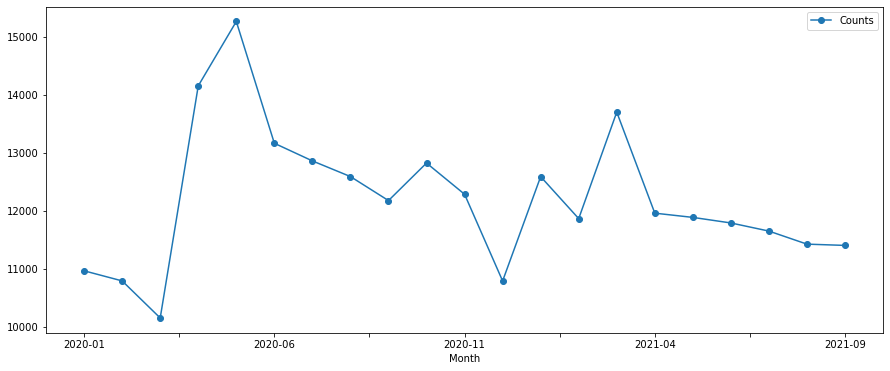

In [60]:
# Show the line chart
months_counts_df.plot(x='Month', y='Counts', figsize= (15,6), marker="o")

#### Normalizing the data set

In [61]:
#Normalizing data using min-max methode

months_counts_df['minmax_norm_count'] = (months_counts_df.Counts - months_counts_df.Counts.min()) / ( months_counts_df.Counts.max() - months_counts_df.Counts.min())
months_counts_df.head(5)

,Month,Counts,minmax_norm_count
17,2020-01,10962,0.159038
18,2020-02,10788,0.125000
20,2020-03,10149,0.000000
1,2020-04,14151,0.782864
0,2020-05,15261,1.000000


#### Graph 2 : Monthly total crime movement after normalise the data set

<AxesSubplot:xlabel='Month'>

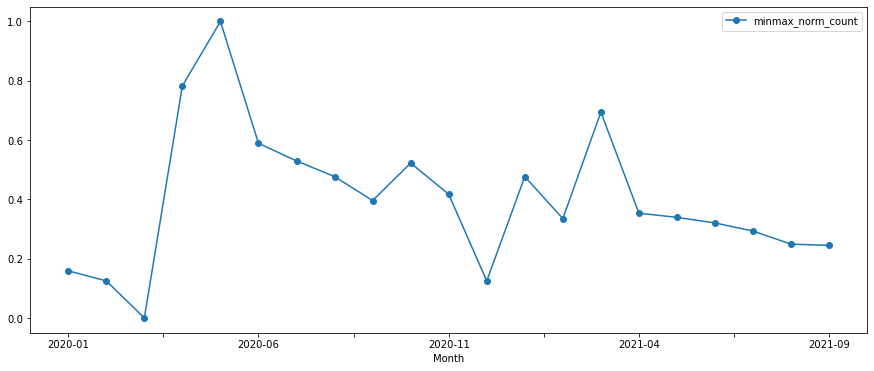

In [62]:
# Show the plot diagram
months_counts_df.plot(x='Month', y='minmax_norm_count', figsize= (15,6), marker="o")

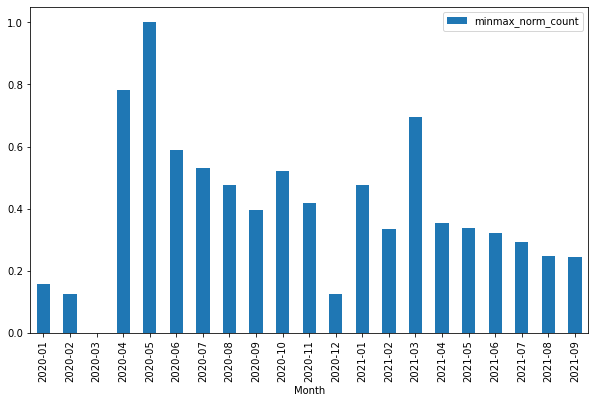

In [63]:
# Additionally showing it in the bar plot diagram
months_counts_df.plot(kind='bar' , x='Month', y='minmax_norm_count', stacked=True, figsize= (10,6));

### <font color = blue> Analysis 2 - Crime types 

#### Examining the monthly crime types can help to identify which types of crimes were most prevalent and whether there were any noticeable changes in their occurrence over time. Thus, this section provide insights over that.

In [64]:
# Count 'Crime Type' and create the dataframe group by 'Month'
crime_type_to_month_df = streetcrime_df.groupby('Month')['Crime type'].value_counts().reset_index(name='Counts')

crime_type_to_month_normalize_df = crime_type_to_month_df
crime_type_to_month_normalize_df.head(5)

,Month,Crime type,Counts
0,2020-01,Violence and sexual offences,3630
1,2020-01,Anti-social behaviour,1813
2,2020-01,Criminal damage and arson,968
3,2020-01,Public order,937
4,2020-01,Shoplifting,809


In [65]:
crime_total = crime_type_to_month_normalize_df['Counts'].sum()
crime_total

256219

In [66]:
# Data Normalisation
crime_type_to_month_normalize_df['normalize_count'] = (crime_type_to_month_normalize_df.Counts / crime_total)*100

# Remove 'count' column  
crime_type_to_month_normalize_df = pd.DataFrame(crime_type_to_month_normalize_df, columns=['Month','Crime type','normalize_count'])


In [67]:
# Rearrange the table(Unstack) for relates to the 'Crime type' and 'Month'
transformed_normalize_df = crime_type_to_month_normalize_df.set_index(['Month', 'Crime type'], drop = True).unstack('Crime type')
transformed_normalize_df.head(5)

normalize_count                          \
Crime type Anti-social behaviour Bicycle theft  Burglary   
Month                                                      
2020-01                 0.707598      0.055812  0.197878   
2020-02                 0.726722      0.049567  0.179534   
2020-03                 0.820392      0.041371  0.175631   
2020-04                 2.854980      0.042151  0.139724   
2020-05                 2.984556      0.053080  0.122161   

                                                                        \
Crime type Criminal damage and arson     Drugs Other crime Other theft   
Month                                                                    
2020-01                     0.377802  0.156897    0.074155    0.277497   
2020-02                     0.385217  0.161971    0.067911    0.279839   
2020-03                     0.389511  0.128015    0.067520    0.246664   
2020-04                     0.304427  0.151043    0.063617    0.178753   
2020-05                     0.313794  0.177192    0.064788    0.218173   

                                                                     \
Crime type Possession of weapons Public order   Robbery Shoplifting   
Month                                                                 
2020-01                 0.024588     0.365703  0.018734    0.315746   
2020-02                 0.021466     0.351262  0.016002    0.340334   
2020-03                 0.018344     0.353994  0.016002    0.257202   
2020-04                 0.020685     0.380534  0.010148    0.139334   
2020-05                 0.024979     0.473033  0.014441    0.148311   

                                                                             
Crime type Theft from the person Vehicle crime Violence and sexual offences  
Month                                                                        
2020-01                 0.044103      0.245103                     1.416757  
2020-02                 0.048786      0.252128                     1.329722  
2020-03                 0.029662      0.227540                     1.189217  
2020-04                 0.018734      0.148701                     1.070178  
2020-05                 0.016392      0.126064                     1.219269

#### Graph 3 : Crime occurance according to the crime types

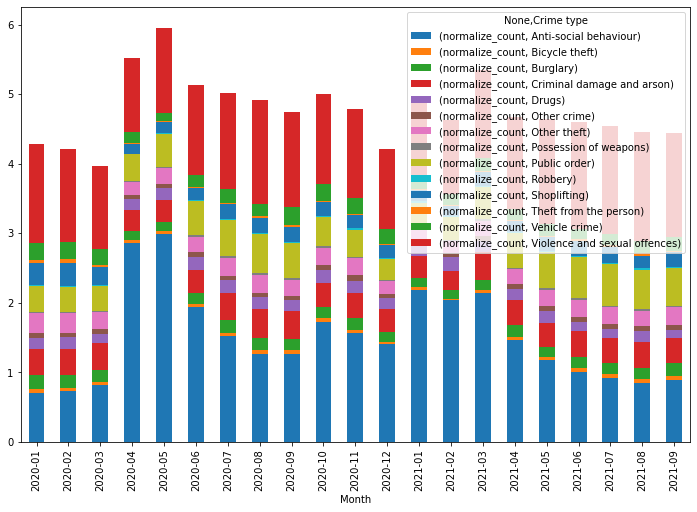

In [68]:
# Draw the plot bar diagram
ax = transformed_normalize_df.plot.bar(stacked=True, figsize=(12,8))

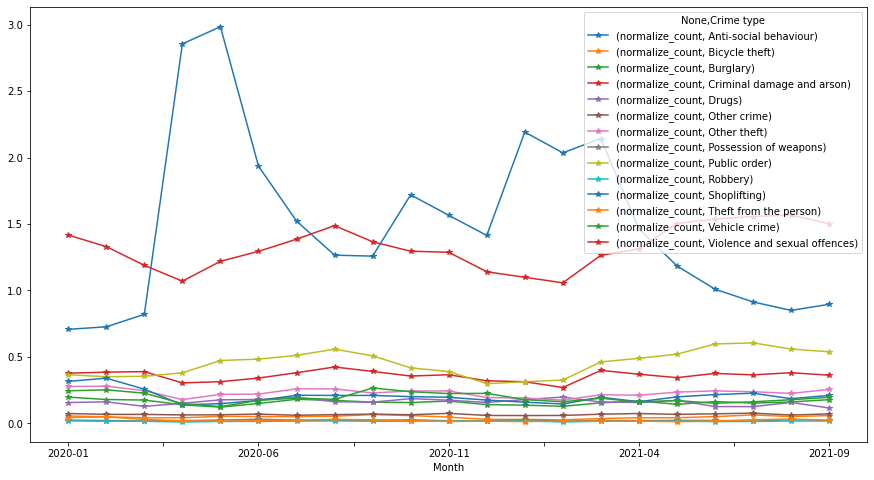

In [69]:
lines = transformed_normalize_df.plot.line(figsize=(15,8),marker="*")

### <font color = blue> Analysis 3 : Analysis of total monthly crimes on YoY (2020/21)

#### Comparing the year-over-year (YoY) trends can provide a deeper understanding of the crime patterns. YoY analysis allows to see if there are any significant changes in crime rates between the same months of different years.

In [70]:
# Rename the 'Month' column to 'YEAR-MONTH'
streetcrime_df = streetcrime_df.rename({'Month':'YEAR-MONTH'}, axis=1)
streetcrime_df.head(5)


,YEAR-MONTH,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type
0,2020-01,South Wales Police,South Wales Police,-3.185528,51.797576,On or near Twyncynghordy Place,Blaenau Gwent 002B,Violence and sexual offences
1,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Anti-social behaviour
2,2020-01,South Wales Police,South Wales Police,-3.659680,51.639072,On or near Heol Ceulanydd,Bridgend 001A,Anti-social behaviour
3,2020-01,South Wales Police,South Wales Police,-3.649808,51.638618,On or near North Street,Bridgend 001A,Criminal damage and arson
4,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Public order


In [73]:
# Get the year value from 'YEAR-MONTH' column(Substring) and add new column as 'YEAR'
streetcrime_df['YEAR'] = pd.DatetimeIndex(streetcrime_df['YEAR-MONTH']).year

# Get the month value from 'YEAR-MONTH' column(Substring) and add new column as 'MONTH'
streetcrime_df['MONTH'] = pd.DatetimeIndex(streetcrime_df['YEAR-MONTH']).month

streetcrime_df.head(5)

,YEAR-MONTH,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type,YEAR,MONTH
0,2020-01,South Wales Police,South Wales Police,-3.185528,51.797576,On or near Twyncynghordy Place,Blaenau Gwent 002B,Violence and sexual offences,2020,1
1,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Anti-social behaviour,2020,1
2,2020-01,South Wales Police,South Wales Police,-3.659680,51.639072,On or near Heol Ceulanydd,Bridgend 001A,Anti-social behaviour,2020,1
3,2020-01,South Wales Police,South Wales Police,-3.649808,51.638618,On or near North Street,Bridgend 001A,Criminal damage and arson,2020,1
4,2020-01,South Wales Police,South Wales Police,-3.658223,51.639129,On or near Hartshorn Terrace,Bridgend 001A,Public order,2020,1


In [75]:
# Create the dataframe by grouping 'Year' and 'Month' seperately
crime_type_counts_with_group_df = streetcrime_df.groupby('MONTH')['YEAR'].value_counts().reset_index(name='Counts')

# Rearrange the table(Unstack) for relative the 'YEAR' and 'Month'
transformed_df2 = crime_type_counts_with_group_df.set_index(['MONTH', 'YEAR'], drop = True).unstack('YEAR')

# add the index
transformed_df2.reset_index(level=0, inplace=True)

# Reset the index
transformed_df2.reset_index(drop=True, inplace=True)
transformed_df2.head(5)

MONTH   Counts         
YEAR           2020     2021
0        1  10962.0  12586.0
1        2  10788.0  11862.0
2        3  10149.0  13698.0
3        4  14151.0  11956.0
4        5  15261.0  11883.0

In [76]:
# Rearrange the column
transformed_df2.columns = range(transformed_df2.shape[1])

# Rename the columns
transformed_df2 = transformed_df2.rename(columns={0:'MONTH',1:'2020',2:'2021'})

# Remove the rows in NaN value
transformed_df2 = transformed_df2[transformed_df2['2021'].notna()]
transformed_df2

,MONTH,2020,2021
0,1,10962.0,12586.0
1,2,10788.0,11862.0
2,3,10149.0,13698.0
3,4,14151.0,11956.0
4,5,15261.0,11883.0
5,6,13161.0,11787.0
6,7,12857.0,11647.0
7,8,12587.0,11422.0
8,9,12173.0,11400.0


In [77]:
# Add month name to intiger month number
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
transformed_df2['MONTH'] = transformed_df2['MONTH'].apply(lambda x: look_up[x])
transformed_df2


,MONTH,2020,2021
0,Jan,10962.0,12586.0
1,Feb,10788.0,11862.0
2,Mar,10149.0,13698.0
3,Apr,14151.0,11956.0
4,May,15261.0,11883.0
5,Jun,13161.0,11787.0
6,Jul,12857.0,11647.0
7,Aug,12587.0,11422.0
8,Sep,12173.0,11400.0


#### Graph 4 : YoY total crimes movement 

<AxesSubplot:xlabel='MONTH'>

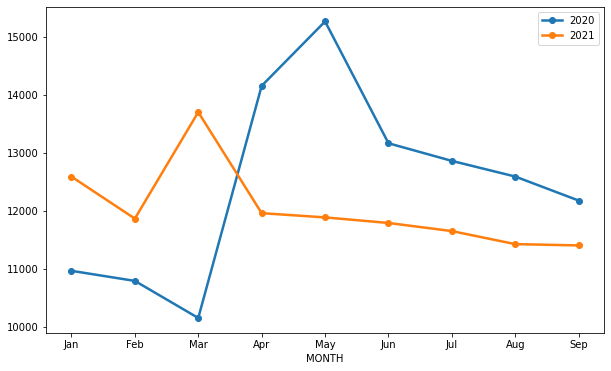

In [78]:
# Show the plot diagram
transformed_df2.set_index('MONTH').plot(figsize=(10, 6), linewidth=2.5, marker="o")


In [79]:
transformed_df2['2021'].mean()

12026.777777777777

In [80]:
transformed_df2['2021'].std()

717.5372425487366

In [81]:
transformed_df2['2020'].mean()

12454.333333333334

In [82]:
transformed_df2['2020'].std()

1651.9916010682377

#### Graph 5 : YoY total crimes movement 

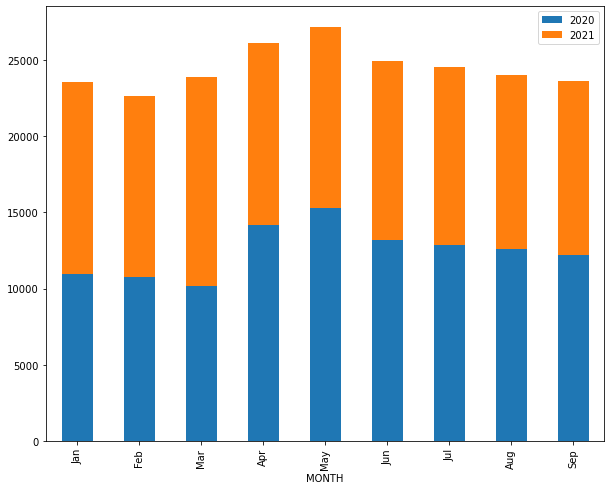

In [83]:
# Show the plot bar diagram
ax = transformed_df2.set_index('MONTH').plot.bar(stacked=True, figsize=(10,8))

### <font color = blue> Analysis 4 : Analysis for the year 2021

In [85]:
streetcrime_df_2021 = streetcrime_df_copy[streetcrime_df_copy['Month'] >= '2021-01']
streetcrime_df_2021.head(5)

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type
150755,2021-01,South Wales Police,South Wales Police,-3.156006,51.766526,On or near Southlands,Blaenau Gwent 005B,Other crime
150756,2021-01,South Wales Police,South Wales Police,-3.245889,51.776739,On or near Nightclub,Blaenau Gwent 006E,Violence and sexual offences
150757,2021-01,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,Bridgend 001A,Anti-social behaviour
150758,2021-01,South Wales Police,South Wales Police,-3.658207,51.633158,On or near Woodlands Terrace,Bridgend 001A,Anti-social behaviour
150759,2021-01,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,Bridgend 001A,Anti-social behaviour


In [86]:
streetcrime_df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108241 entries, 150755 to 261907
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Month         108241 non-null  object 
 1   Reported by   108241 non-null  object 
 2   Falls within  108241 non-null  object 
 3   Longitude     108241 non-null  float64
 4   Latitude      108241 non-null  float64
 5   Location      108241 non-null  object 
 6   LSOA name     108241 non-null  object 
 7   Crime type    108241 non-null  object 
dtypes: float64(2), object(6)
memory usage: 7.4+ MB


###  <font color = blue>Analysis 5 : Crime analysis for the month of September 2020 vs 2021

#### Comparing the month-over-month (MoM) trends can provide a deeper understanding of the crime patterns. MoM analysis helps identify any seasonal or monthly fluctuations in crime rates.

In [87]:
# Create Dataframe only for Sep 2021 (2021-09)
streetcrime_month_2021_df = streetcrime_df_2021[streetcrime_df_2021.Month == '2021-09']
streetcrime_month_2021_df.head(5)

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA name,Crime type
250508,2021-09,South Wales Police,South Wales Police,-3.658207,51.633158,On or near Woodlands Terrace,Bridgend 001A,Anti-social behaviour
250509,2021-09,South Wales Police,South Wales Police,-3.658207,51.633158,On or near Woodlands Terrace,Bridgend 001A,Anti-social behaviour
250510,2021-09,South Wales Police,South Wales Police,-3.658966,51.633363,On or near Dyffryn Road,Bridgend 001A,Anti-social behaviour
250511,2021-09,South Wales Police,South Wales Police,-3.658966,51.633363,On or near Dyffryn Road,Bridgend 001A,Anti-social behaviour
250512,2021-09,South Wales Police,South Wales Police,-3.649808,51.638618,On or near North Street,Bridgend 001A,Anti-social behaviour


In [88]:
streetcrime_month_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11400 entries, 250508 to 261907
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         11400 non-null  object 
 1   Reported by   11400 non-null  object 
 2   Falls within  11400 non-null  object 
 3   Longitude     11400 non-null  float64
 4   Latitude      11400 non-null  float64
 5   Location      11400 non-null  object 
 6   LSOA name     11400 non-null  object 
 7   Crime type    11400 non-null  object 
dtypes: float64(2), object(6)
memory usage: 801.6+ KB


In [89]:
# Count the occurence according to the 'Crime Type'
streetcrime_month_2021_df = streetcrime_month_2021_df["Crime type"].value_counts().rename_axis('Crime type').to_frame('Counts')
print(streetcrime_month_2021_df)

                              Counts
Crime type                          
Violence and sexual offences    3849
Anti-social behaviour           2295
Public order                    1380
Criminal damage and arson        929
Other theft                      655
Shoplifting                      539
Vehicle crime                    502
Burglary                         457
Drugs                            297
Other crime                      183
Bicycle theft                    150
Theft from the person             62
Possession of weapons             56
Robbery                           46


In [90]:
# ReIndexing and rename the columns
streetcrime_month_2021_df = streetcrime_month_2021_df.reset_index()
streetcrime_month_2021_df.columns = ['Crime type', 'Counts']
streetcrime_month_2021_df

,Crime type,Counts
0,Violence and sexual offences,3849
1,Anti-social behaviour,2295
2,Public order,1380
3,Criminal damage and arson,929
4,Other theft,655
5,Shoplifting,539
6,Vehicle crime,502
7,Burglary,457
8,Drugs,297
9,Other crime,183


In [92]:
# Create Dataframe only for year 2020
streetcrime_df_2020 = streetcrime_df_copy[streetcrime_df_copy['Month'] < '2021-01']

# Create Dataframe only for September 2020 (2020-09)
streetcrime_month_2020_df = streetcrime_df_2020[streetcrime_df_2020.Month == '2020-09']


In [93]:
# Count the occurence according to the 'Crime Type'
streetcrime_month_2020_df = streetcrime_month_2020_df["Crime type"].value_counts().rename_axis('Crime type').to_frame('Counts')

# ReIndexing and rename the columns
streetcrime_month_2020_df = streetcrime_month_2020_df.reset_index()
streetcrime_month_2020_df.columns = ['Crime type', 'Counts']
streetcrime_month_2020_df

,Crime type,Counts
0,Violence and sexual offences,3501
1,Anti-social behaviour,3224
2,Public order,1303
3,Criminal damage and arson,1002
4,Vehicle crime,682
5,Other theft,587
6,Shoplifting,539
7,Burglary,410
8,Drugs,409
9,Other crime,178


In [94]:
# Merging data frames for the plot bar diagram
combined = streetcrime_month_2020_df.merge(streetcrime_month_2021_df, on="Crime type", suffixes=["1", "2"]).set_index('Crime type')

combined = combined.rename(columns={"Counts1": "2020", "Counts2": "2021"})


In [95]:
combined

,2020,2021
Crime type,,
Violence and sexual offences,3501,3849
Anti-social behaviour,3224,2295
Public order,1303,1380
Criminal damage and arson,1002,929
Vehicle crime,682,502
Other theft,587,655
Shoplifting,539,539
Burglary,410,457
Drugs,409,297


#### Graph 6 : Crime types as at Sep, 2020 vs 2021

<AxesSubplot:xlabel='Crime type'>

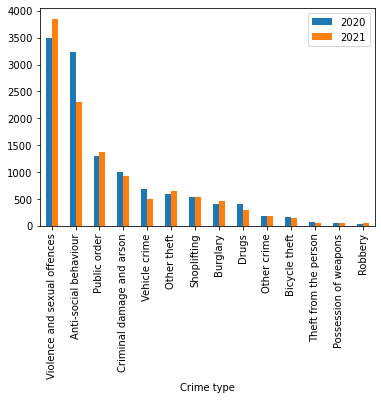

In [96]:
# Show the plot bar diagram on two year comparrisson
combined.plot.bar()

#### Graph 7 : Crime types as at Sep, 2020 vs 2021

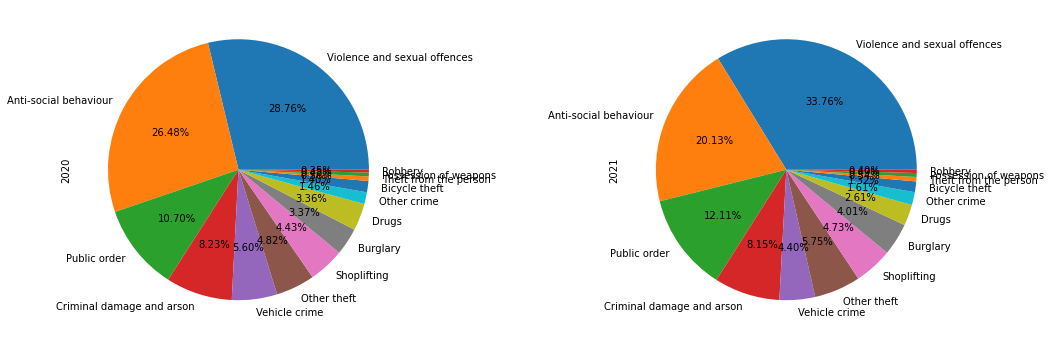

In [97]:
#plot = combined.groupby(['Crime type']).sum().plot(kind = "pie",y="Counts",legend=False,figsize=(10,10),autopct="%.2f%%", title =('Sep-2020'))
plot = combined.plot.pie(subplots=True, legend=False,figsize=(18,6),autopct="%.2f%%")

### <font color = blue> Analysis 6 : Analysis of 'Violence and sexual offences' crime type movement in 2021

#### Violence and sexual offences are the most common crime type in the year 2021. Hence, incorporating geo data to visualize the locations where crimes occurred the most can help police forces focus their resources and strategies on those areas. By identifying high-crime locations, law enforcement can enhance their presence in those areas, implement targeted interventions, and develop strategies to mitigate criminal activities.

In [98]:
# Crate new dataframe according to the selected one crime type
streetcrime_crtype1_df = streetcrime_df_2021[streetcrime_df_2021['Crime type'] == 'Violence and sexual offences']


In [99]:
# Count crime occurance according to the month
streetcrime_crtype2_df = streetcrime_crtype1_df['Month'].value_counts()
# Reset the index
streetcrime_crtype2_df = streetcrime_crtype2_df.reset_index()
# Add Month and Count new columns
streetcrime_crtype2_df.columns = ['Month', 'Counts']
# Sort values according to the 'Month'
streetcrime_crtype2_df = streetcrime_crtype2_df.sort_values(by ='Month')
streetcrime_crtype2_df

,Month,Counts
7,2021-01,2816
8,2021-02,2710
6,2021-03,3241
5,2021-04,3361
3,2021-05,3853
2,2021-06,3939
1,2021-07,3988
0,2021-08,4016
4,2021-09,3849


#### Graph 8 : Movement of crime type 'Violence and sexual offences' in 2021 

<AxesSubplot:xlabel='Month'>

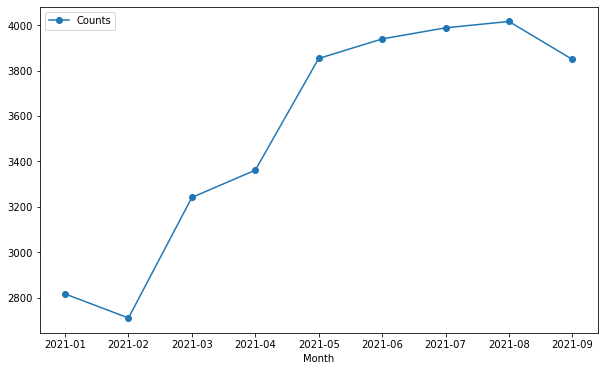

In [100]:
# Show the plot diagram
streetcrime_crtype2_df.plot(x='Month', y='Counts', figsize= (10,6), marker="o" )

In [101]:
# Filter the data to plot the map for the selected crime type
streetcrime_df2_2021 = streetcrime_df_2021[streetcrime_df_2021['Crime type'] == 'Violence and sexual offences']
streetcrime_df2_2021 = streetcrime_df2_2021[streetcrime_df2_2021['Month'] == '2021-09']
streetcrime_df3_2021 = streetcrime_df2_2021.head(1500)


#### Graph 9 : Plot all crime location on a map for the month of September 2021

In [103]:
# Show the diagram according to one month
periodic_df = streetcrime_df_2021[streetcrime_df_2021['Month'] == '2021-09']
crime_locations = list(zip(periodic_df.Latitude, periodic_df.Longitude))
base_map = folium.Map(location=[periodic_df.Latitude.mean(), periodic_df.Longitude.mean()], zoom_start=10)
heatmap = plugins.HeatMap(crime_locations, radius=5, blur=2)
base_map.add_child(heatmap)

#### Graph 10 : Plot crime location on a map for first 1500 records of the crime type 'Violence and sexual offences'

In [102]:
# Show the points in the map for first 1500 records

map = folium.Map(location=[streetcrime_df3_2021.Latitude.mean(), streetcrime_df3_2021.Longitude.mean()], 
                 zoom_start=9, control_scale=True)
for index, location_info in streetcrime_df3_2021.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Location"]).add_to(map)
map